## STEP 1 : DATA COLLECTION

In [62]:
#IMPORTING NECESSARY 00 LIBRARIES
import pandas as pd#for dataframe handling
import numpy as np#for matrices
import streamlit as st#used for webpage
from streamlit_option_menu import option_menu#used for webpage
import matplotlib.pyplot as plt#for plotting graphs
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#LOADING & PROCESSING DATA
df = pd.read_csv("psychological_instability_data.csv")#loading the dataset
print('[info] data loaded successfully...')

[info] data loaded successfully...


## STEP 2 : EDA

#### 2a. BASIC EDA

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [64]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


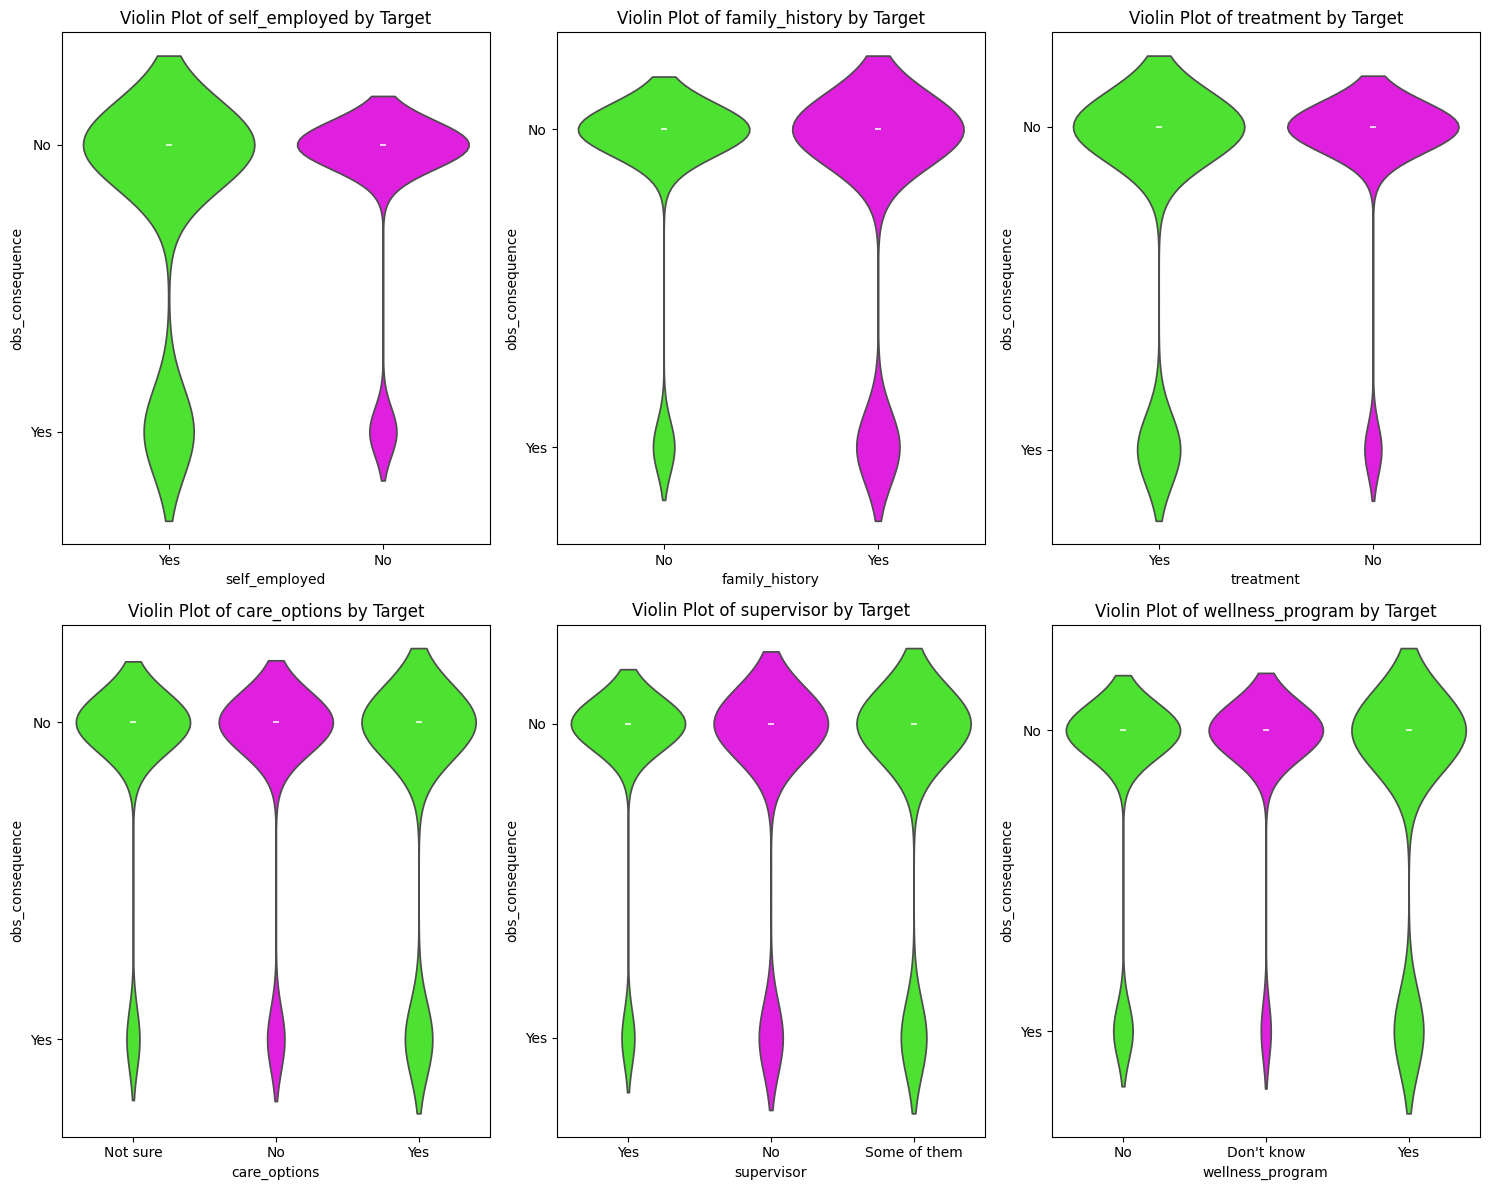

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define a custom neon theme palette
neon_palette = ["#39FF14", "#FF00FF"]

# Set the custom neon theme palette
sns.set_palette(neon_palette)

# Specify the columns you want to include in the violin plots
selected_columns = [ 'self_employed', 'family_history','treatment', 'care_options', 'supervisor', 'wellness_program']

# Create a grid for displaying violin plots
num_columns = len(selected_columns)
num_rows = int(np.ceil(num_columns / 3))

plt.figure(figsize=(15, 12))

for i, column in enumerate(selected_columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.violinplot(x=column, y="obs_consequence", data=df, palette=neon_palette)
    plt.title(f"Violin Plot of {column} by Target")

# Adjust layout
plt.tight_layout()

# Show the grid of violin plots
# plt.savefig('eda1.png')
plt.show()


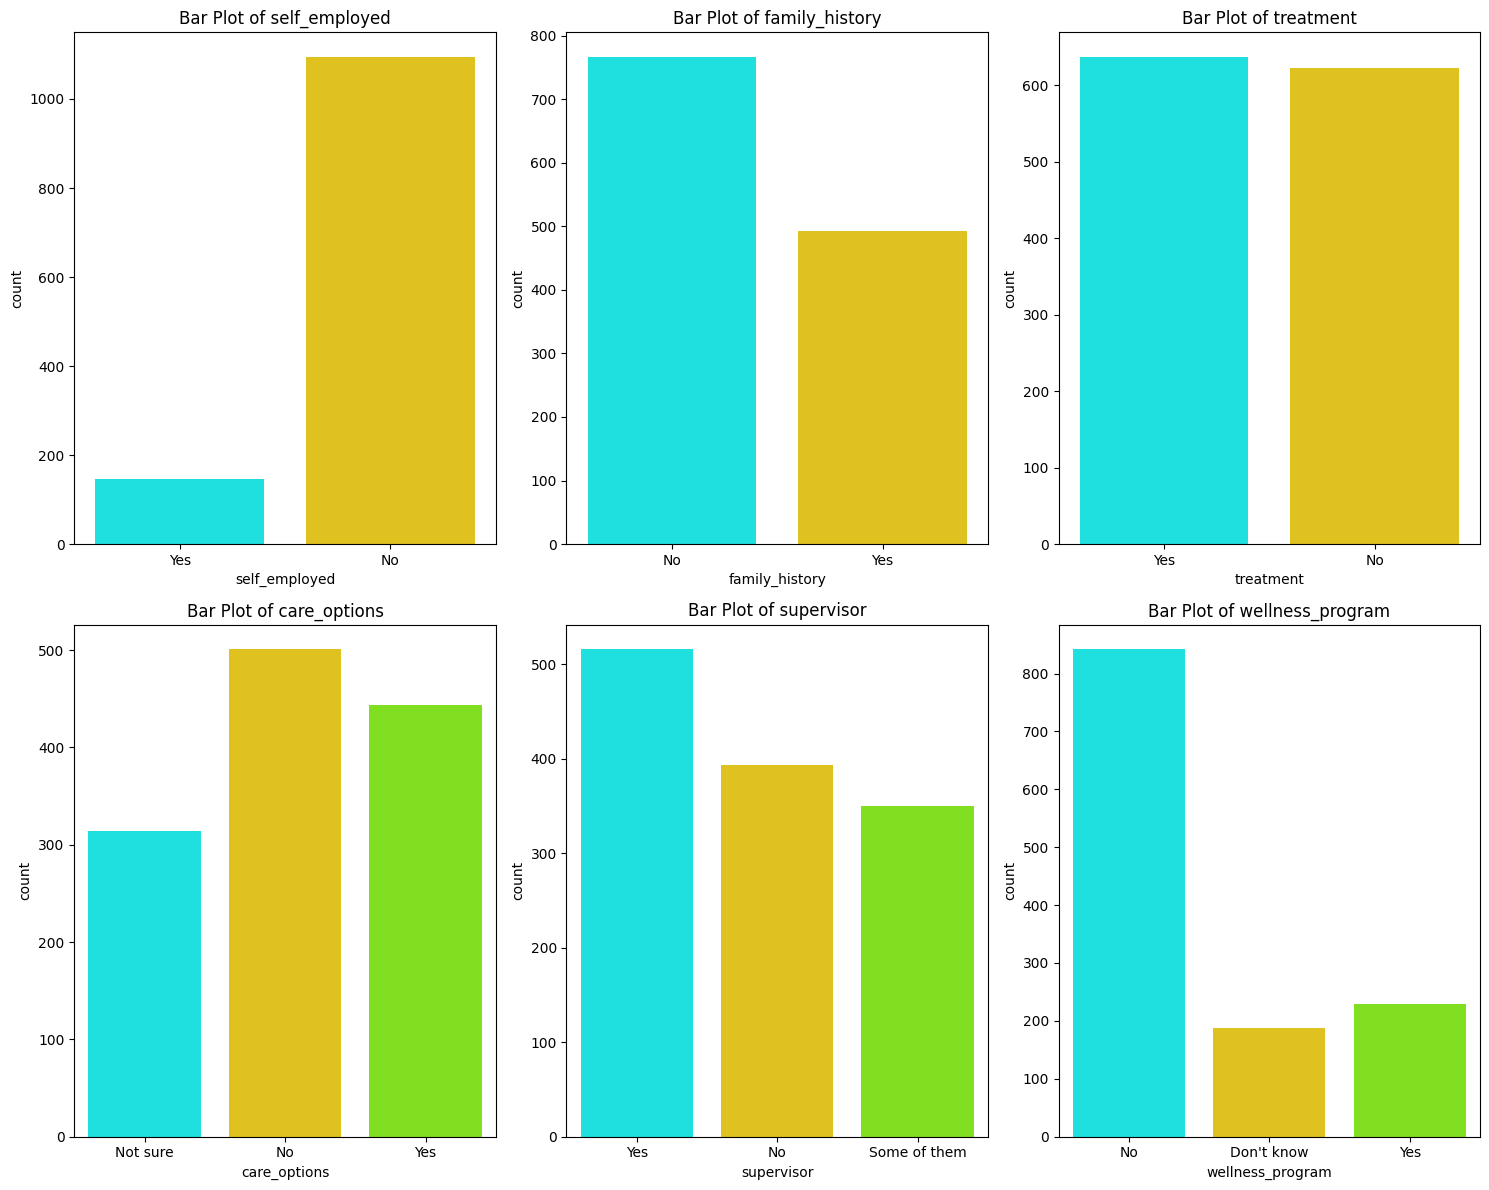

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

# Define a custom neon theme palette for bar plots
neon_palette_bar = ["#00FFFF", "#FFD700", "#7FFF00", "#FF6347", "#8A2BE2", "#00FA9A"]

# Set the custom neon theme palette for bar plots
sns.set_palette(neon_palette_bar)

# Specify the columns used in the violin plots
selected_columns_bar = [ 'self_employed', 'family_history','treatment', 'care_options', 'supervisor', 'wellness_program']

# Create a grid for displaying bar plots
num_columns_bar = len(selected_columns_bar)
num_rows_bar = int(np.ceil(num_columns_bar / 3))

plt.figure(figsize=(15, 12))

for i, column in enumerate(selected_columns_bar):
    plt.subplot(num_rows_bar, 3, i + 1)
    sns.countplot(x=column, data=df, palette=neon_palette_bar)
    plt.title(f"Bar Plot of {column}")

# Adjust layout
plt.tight_layout()

# Show the grid of bar plots
# plt.savefig('eda_2.png')
plt.show()


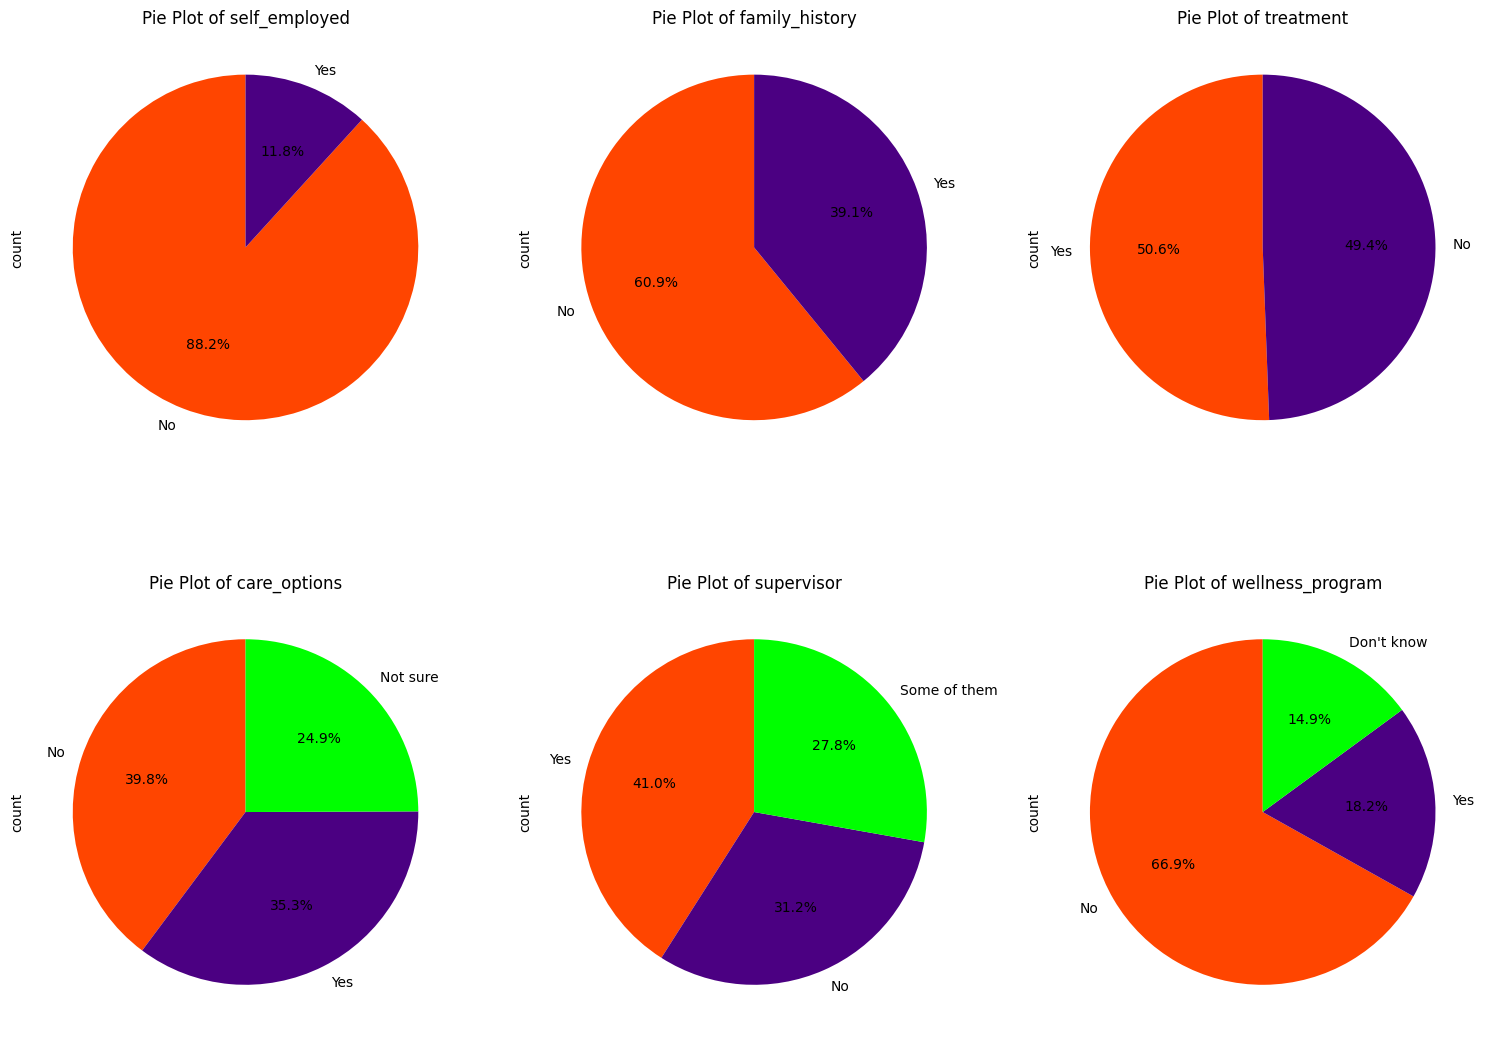

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

# Define a new eye-catching neon theme palette for pie plots
neon_palette_pie = ["#FF4500", "#4B0082", "#00FF00", "#FFFF00", "#1E90FF", "#FF1493"]

# Set the custom neon theme palette for pie plots
sns.set_palette(neon_palette_pie)

# Specify the columns used in the pie plots
selected_columns_pie = [ 'self_employed', 'family_history','treatment', 'care_options', 'supervisor', 'wellness_program']

# Create a grid for displaying pie plots
num_columns_pie = len(selected_columns_pie)
num_rows_pie = int(np.ceil(num_columns_pie / 3))

plt.figure(figsize=(15, 12))

for i, column in enumerate(selected_columns_pie):
    plt.subplot(num_rows_pie, 3, i + 1)
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=neon_palette_pie)
    plt.title(f"Pie Plot of {column}")

# Adjust layout
plt.tight_layout()

# Show the grid of pie plots
# plt.savefig('eda_3.png')
plt.show()


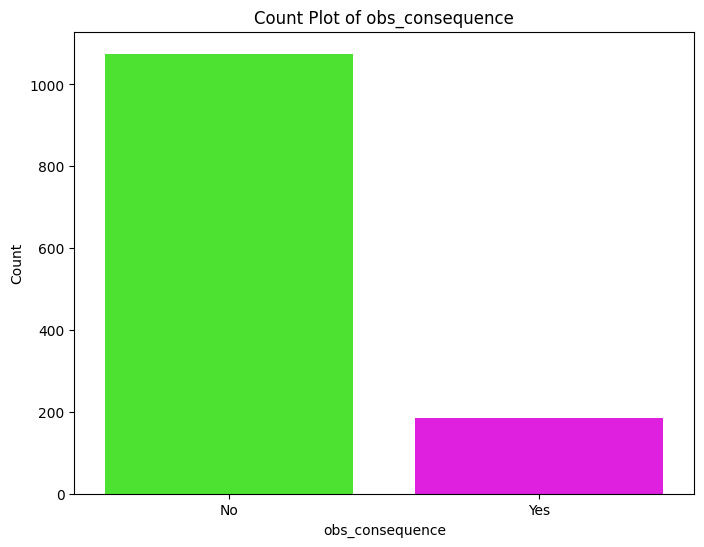

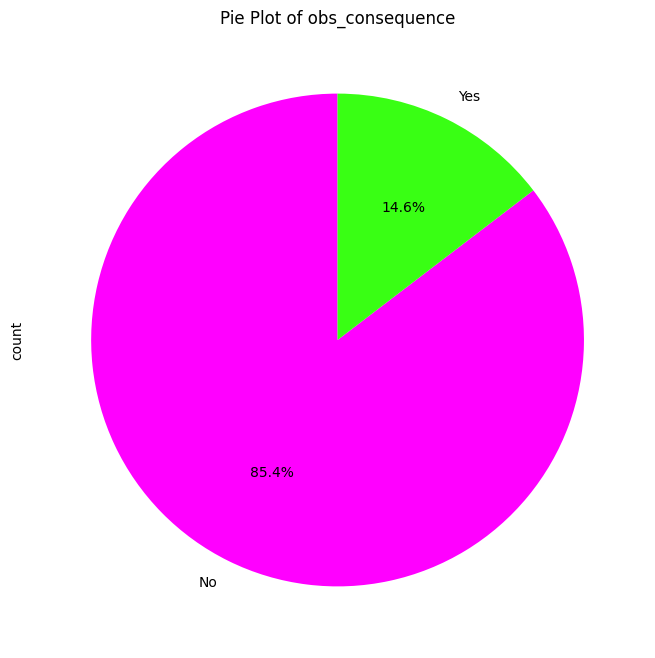

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom neon theme palette for plots
neon_palette = ["#39FF14", "#FF00FF"]

# Set the custom neon theme palette for plots
sns.set_palette(neon_palette)

# Count Plot for 'obs_consequence' column
plt.figure(figsize=(8, 6))
sns.countplot(x='obs_consequence', data=df, palette=neon_palette)
plt.title("Count Plot of obs_consequence")
plt.xlabel("obs_consequence")
plt.ylabel("Count")
# plt.savefig('count_plot_obs_consequence.png')
plt.savefig('eda_4.png')
plt.show()

neon_palette = ["#FF00FF","#39FF14"]
# Pie Plot for 'obs_consequence' column
plt.figure(figsize=(8, 8))
df['obs_consequence'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=neon_palette)
plt.title("Pie Plot of obs_consequence")
# plt.savefig('pie_plot_obs_consequence.png')
plt.savefig('eda_5.png')
plt.show()


---

#### TRAINING A HYBRID MODEL

In [11]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# Define base models
svm = SVC(probability=True)  # SVM with probability estimates
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()

# Define the meta-model
xgb_meta = xgb.XGBClassifier()

# Create the stacked model
stacked_model = StackingClassifier(
    estimators=[('svm', svm), ('rf', rf), ('dt', dt)],
    final_estimator=xgb_meta
)

# Train the stacked model
stacked_model.fit(X_train, Y_train)

print('[info] Stacked model training complete...')

# Save the stacked model to a file
joblib.dump(stacked_model, "stacked_model.pkl")

[info] Stacked model training complete...


['stacked_model.pkl']

#### EVALUATING THE HYBRID MODEL

In [12]:
# Make predictions with the stacked model on the test data
stacked_model_test_prediction = stacked_model.predict(X_test)

# Display evaluation metrics
print('ACCURACY OF STACKED MODEL IS:', accuracy_score(Y_test, stacked_model_test_prediction))
print('PRECISION OF STACKED MODEL IS:', precision_score(Y_test, stacked_model_test_prediction))
print('RECALL OF STACKED MODEL IS:', recall_score(Y_test, stacked_model_test_prediction))
print('F1 SCORE OF STACKED MODEL IS:', f1_score(Y_test, stacked_model_test_prediction))

ACCURACY OF STACKED MODEL IS: 0.8643122676579925
PRECISION OF STACKED MODEL IS: 0.8661417322834646
RECALL OF STACKED MODEL IS: 0.8494208494208494
F1 SCORE OF STACKED MODEL IS: 0.8576998050682262


----

In [13]:
accuracies = [accuracy_score(Y_test,svm_test_prediction),
             accuracy_score(Y_test,rf_test_prediction),
             accuracy_score(Y_test,dt_test_prediction),
             accuracy_score(Y_test, stacked_model_test_prediction)]

precisions = [precision_score(Y_test,svm_test_prediction),
             precision_score(Y_test,rf_test_prediction),
             precision_score(Y_test,dt_test_prediction),
             precision_score(Y_test, stacked_model_test_prediction)]

recalls = [recall_score(Y_test,svm_test_prediction),
             recall_score(Y_test,rf_test_prediction),
             recall_score(Y_test,dt_test_prediction),
              recall_score(Y_test, stacked_model_test_prediction)]

f1 = [f1_score(Y_test,svm_test_prediction),
             f1_score(Y_test,rf_test_prediction),
             f1_score(Y_test,dt_test_prediction),
             f1_score(Y_test, stacked_model_test_prediction)]

models = ['svm', 'random forest', 'decision tree','stacked xgboost']

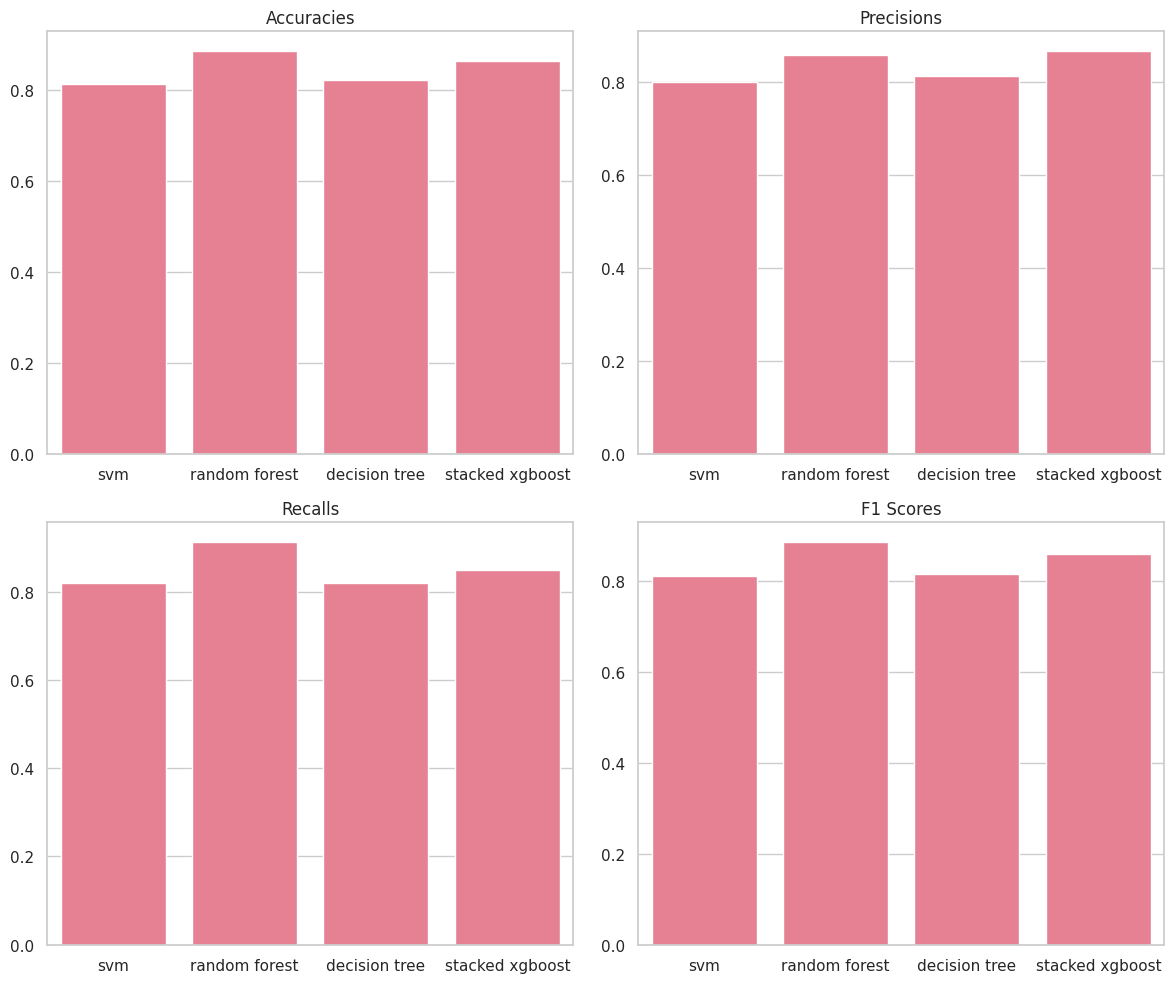

<Figure size 640x480 with 0 Axes>

In [14]:
# Set the style to a neon theme
sns.set(style="whitegrid")
sns.set_palette("husl")

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot accuracies
sns.barplot(x=models, y=accuracies, ax=axes[0, 0])
axes[0, 0].set_title('Accuracies')

# Plot precisions
sns.barplot(x=models, y=precisions, ax=axes[0, 1])
axes[0, 1].set_title('Precisions')

# Plot recalls
sns.barplot(x=models, y=recalls, ax=axes[1, 0])
axes[1, 0].set_title('Recalls')

# Plot F1 scores
sns.barplot(x=models, y=f1, ax=axes[1, 1])
axes[1, 1].set_title('F1 Scores')

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()

plt.savefig('plots/eda_plots/')